# 1. Introduction 
Questions that passengers and airports may consider from this dataset 
- Question1: Which airport has the lower rate of flight delays? Passenger standpoint
- Question2: What reasons will be in result of DepDelay? Airport and passenger standpoint 
- Question3: What's the ranking of depart delay from Unique Carrier? Passenger standpoint

### This project mainly includes the following contents:
1. Data preparation
2. Using the dataset to analyze the airport situation
3. Solving the questions that passengers and airports may consider.

# 2. Data Preparation

In [297]:
#import liberary
import pandas as pd
from pandas import Series, DataFrame as df
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

filename = "https://raw.githubusercontent.com/jtopor/DAV-5400/master/Project1/hflights.csv"
df_flight = pd.read_csv(filename)
df_flight.head(10)

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted
0,2011,1,1,6,1400.0,1500.0,AA,428,N576AA,60.0,...,-10.0,0.0,IAH,DFW,224,7.0,13.0,0,NaN,0
1,2011,1,2,7,1401.0,1501.0,AA,428,N557AA,60.0,...,-9.0,1.0,IAH,DFW,224,6.0,9.0,0,NaN,0
2,2011,1,3,1,1352.0,1502.0,AA,428,N541AA,70.0,...,-8.0,-8.0,IAH,DFW,224,5.0,17.0,0,NaN,0
3,2011,1,4,2,1403.0,1513.0,AA,428,N403AA,70.0,...,3.0,3.0,IAH,DFW,224,9.0,22.0,0,NaN,0
4,2011,1,5,3,1405.0,1507.0,AA,428,N492AA,62.0,...,-3.0,5.0,IAH,DFW,224,9.0,9.0,0,NaN,0
5,2011,1,6,4,1359.0,1503.0,AA,428,N262AA,64.0,...,-7.0,-1.0,IAH,DFW,224,6.0,13.0,0,NaN,0
6,2011,1,7,5,1359.0,1509.0,AA,428,N493AA,70.0,...,-1.0,-1.0,IAH,DFW,224,12.0,15.0,0,NaN,0
7,2011,1,8,6,1355.0,1454.0,AA,428,N477AA,59.0,...,-16.0,-5.0,IAH,DFW,224,7.0,12.0,0,NaN,0
8,2011,1,9,7,1443.0,1554.0,AA,428,N476AA,71.0,...,44.0,43.0,IAH,DFW,224,8.0,22.0,0,NaN,0
9,2011,1,10,1,1443.0,1553.0,AA,428,N504AA,70.0,...,43.0,43.0,IAH,DFW,224,6.0,19.0,0,NaN,0


### clear data

In [298]:
df_flight.isnull().sum()

Year                     0
Month                    0
DayofMonth               0
DayOfWeek                0
DepTime                215
ArrTime                234
UniqueCarrier            0
FlightNum                0
TailNum                108
ActualElapsedTime      262
AirTime                262
ArrDelay               262
DepDelay               215
Origin                   0
Dest                     0
Distance                 0
TaxiIn                 234
TaxiOut                220
Cancelled                0
CancellationCode     19776
Diverted                 0
dtype: int64

#### missing value

In [299]:
# small missing values
df_flight.dropna(subset=['DepTime', 'ArrTime','TailNum','ActualElapsedTime','AirTime','ArrDelay','DepDelay','TaxiIn','TaxiOut'], inplace=True)
# large quantity of missing value
df_flight.drop(["CancellationCode"], axis = 1, inplace = True)
df_flight.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19738 entries, 0 to 19999
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               19738 non-null  int64  
 1   Month              19738 non-null  int64  
 2   DayofMonth         19738 non-null  int64  
 3   DayOfWeek          19738 non-null  int64  
 4   DepTime            19738 non-null  float64
 5   ArrTime            19738 non-null  float64
 6   UniqueCarrier      19738 non-null  object 
 7   FlightNum          19738 non-null  int64  
 8   TailNum            19738 non-null  object 
 9   ActualElapsedTime  19738 non-null  float64
 10  AirTime            19738 non-null  float64
 11  ArrDelay           19738 non-null  float64
 12  DepDelay           19738 non-null  float64
 13  Origin             19738 non-null  object 
 14  Dest               19738 non-null  object 
 15  Distance           19738 non-null  int64  
 16  TaxiIn             197

#### duplicate data

Duplicate data may be generated during data entry and data integration processes

In [300]:
df_flight[df_flight.duplicated()]

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted


- Result: We can see, no duplicate data is included

#### outlier Detection

In [301]:
df_flight.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,FlightNum,ActualElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
count,19738.0,19738.000000,19738.000000,19738.000000,19738.000000,19738.000000,19738.000000,19738.000000,19738.000000,19738.000000,19738.000000,19738.000000,19738.000000,19738.000000,19738.0,19738.0
mean,2011.0,1.054362,16.344412,4.031969,1396.377141,1586.746276,1626.262691,126.795319,105.584355,5.205340,8.271253,772.720488,6.075945,15.135019,0.0,0.0
std,0.0,0.226737,9.025409,2.094597,441.551495,458.226193,1136.382453,60.158125,57.655970,25.383494,23.861301,457.970805,4.086955,7.049428,0.0,0.0
min,2011.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,23.000000,-49.000000,-18.000000,127.000000,1.000000,4.000000,0.0,0.0
25%,2011.0,1.000000,8.000000,2.000000,1026.000000,1224.000000,584.000000,74.000000,54.000000,-8.000000,-3.000000,351.000000,4.000000,10.000000,0.0,0.0
50%,2011.0,1.000000,17.000000,4.000000,1416.000000,1620.000000,1644.000000,123.000000,102.000000,0.000000,1.000000,787.000000,5.000000,14.000000,0.0,0.0
75%,2011.0,1.000000,25.000000,6.000000,1801.000000,1955.000000,2537.500000,162.000000,138.000000,11.000000,10.000000,1034.000000,7.000000,18.000000,0.0,0.0
max,2011.0,2.000000,31.000000,7.000000,2335.000000,2400.000000,7037.000000,539.000000,499.000000,775.000000,780.000000,3904.000000,140.000000,78.000000,0.0,0.0


##### Looking at the variable ArrDelay, DepDelay, TaxiIn
- Result: It is easy to detect outliers resulting from incorrect data because the defference of minimum and maximum values is too large and the one of them in each attributes is too far from the median. We should detect these attributes by outlier tool boxplot.

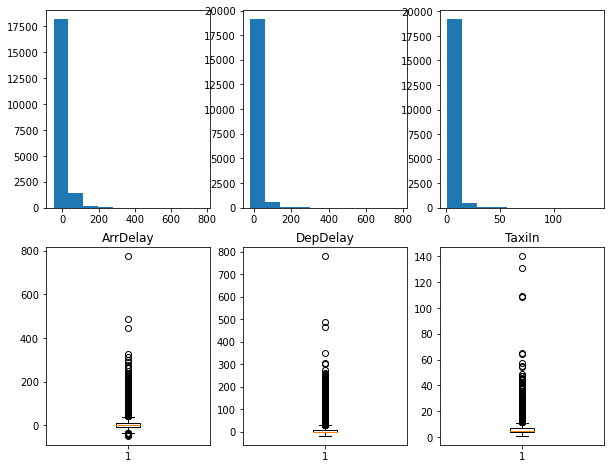

In [302]:
#numerical attribute
numerical = ['ArrDelay', 'DepDelay','TaxiIn']

# set figure size
fig = plt.figure(figsize=(10, 8))
i = 1
for f in numerical:
    plt.subplot(2, 3, i)    
    plt.hist(df_flight[f])
    plt.subplot(2, 3, i+3)
    plt.boxplot(df_flight[f])
    plt.title(f)
    i += 1
plt.show()

##### From this BoxPlot, we can see that
- Result: ArrDelay, DepDelay, TaxiIn have some outlier values as mentioned, we should drop these values

In [303]:
# remove outlier values
df_flight = df_flight[(df_flight['ArrDelay'] < 150) & (df_flight['DepDelay'] < 160) & (df_flight['TaxiIn'] < 27)]
df_flight.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19559 entries, 0 to 19999
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               19559 non-null  int64  
 1   Month              19559 non-null  int64  
 2   DayofMonth         19559 non-null  int64  
 3   DayOfWeek          19559 non-null  int64  
 4   DepTime            19559 non-null  float64
 5   ArrTime            19559 non-null  float64
 6   UniqueCarrier      19559 non-null  object 
 7   FlightNum          19559 non-null  int64  
 8   TailNum            19559 non-null  object 
 9   ActualElapsedTime  19559 non-null  float64
 10  AirTime            19559 non-null  float64
 11  ArrDelay           19559 non-null  float64
 12  DepDelay           19559 non-null  float64
 13  Origin             19559 non-null  object 
 14  Dest               19559 non-null  object 
 15  Distance           19559 non-null  int64  
 16  TaxiIn             195

# 3. Exploratory Data Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E11354CA90>,
      dtype=object)

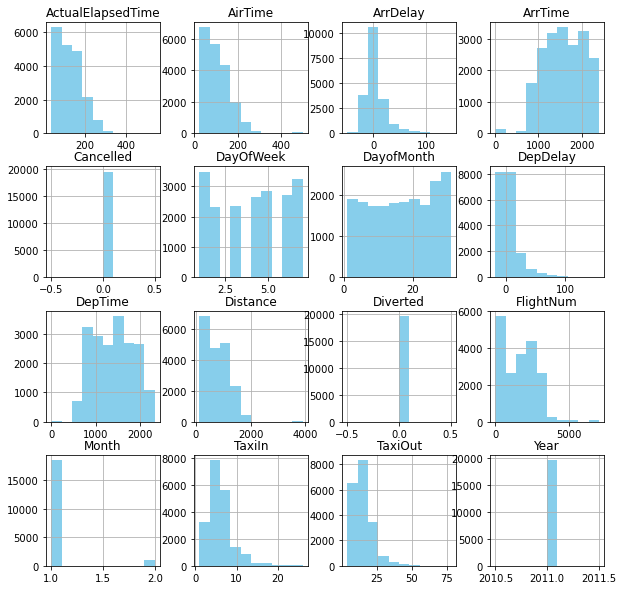

In [304]:
#plot numerical data histogram
df_flight.hist(figsize=(10,10), color='skyblue')

Result: From this basic histogram(which mixed numerical and categorical ordinal data), we can see that
- some attributes has some diverse distribution, such as ActualElapsedTime, Air_Time, ArrDelay, DayofWeek, DepDelay, Distance, TaxiIn, TaxiOut. These may be useful attributes.
- Uniform-type distribution may not be a useful feature, such as DayofMonth, ArrTime, DepTime, FlightNum
- Some attributes has a quite imbalanced distribution, and it may not be helpful on feature selection, such as Cancelled, Diverted, Month, Year.

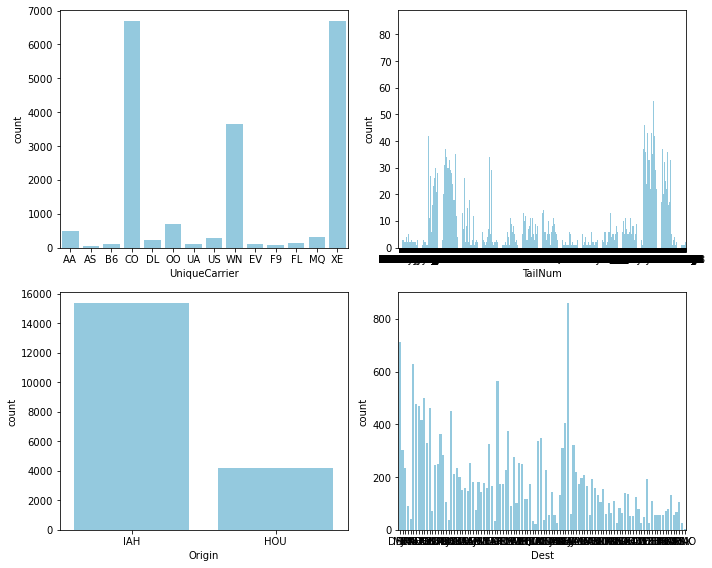

In [305]:
#plot categorical data
fig, axes =plt.subplots(2,2, figsize=(10,8)) #, sharex=True
axes = axes.flatten()


object_bol = df_flight.dtypes == 'object'
for ax, catplot in zip(axes, df_flight.dtypes[object_bol].index):
    sns.countplot(x=catplot, data=df_flight, ax=ax, color = 'skyblue')
plt.tight_layout()  
plt.show()

From this count plot, we can see
- The unique carrier CO, WN, XE are the mainly carrier.
- The Number of flight at origin airport IAH is much higher than HOU.
- TailNum, Dest attribute has very sparse distribution.

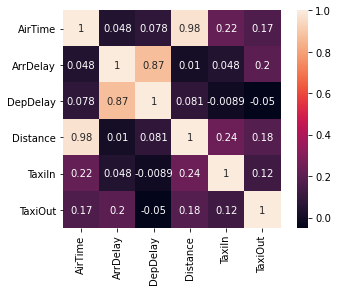

In [306]:
#numerical attribute, although UniqueCarrier and Origin should be treated as categorical data.
numerical = ['UniqueCarrier','Origin', 'AirTime', 'ArrDelay', 'DepDelay', 'Distance', 'TaxiIn', 'TaxiOut']#TARGET, 
##relationship of numerical data--- Correlation Map
corr = df_flight[numerical].corr()
sns.heatmap(data=corr, square=True , annot=True, cbar=True)

As we all know, the AirTime and Distance has obviously a linear relationship, as well as DepDelay and ArrDelay, which should be ignored.
For the remaining data, there is certain coorelation between Distance and TaxiIn

As we want to analyze the reason or relationship with DepDelay, the value lower than 0 means depart before estimate time
Since all passengers arrived, this situation will happened. For this, all DepDelay value less than 0 as 'OnTime' as below

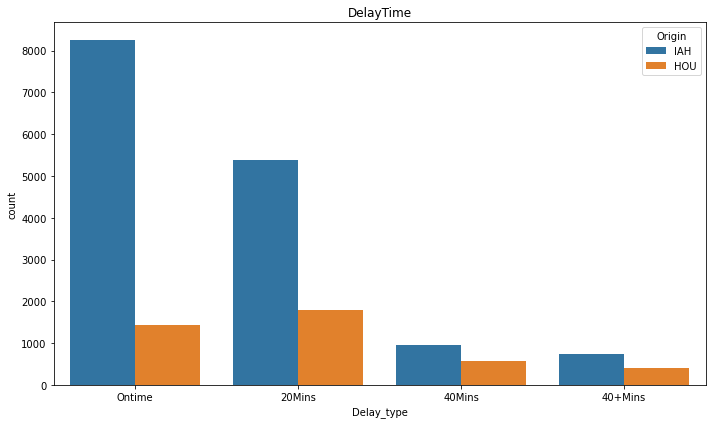

In [312]:
#groupby the delay time
Ontime = (df_flight.DepDelay <=0)
Delay_within20Mins = (df_flight.DepDelay <=20) & (df_flight.DepDelay >0)
Delay_within40mins = (df_flight.DepDelay <=40) & (df_flight.DepDelay >20)
Delay_40plusmins = df_flight.DepDelay >40


#insert 1 more column 'Delay_type'
#Ontime: value = 0
#Delay_within20Mins: value = 1
#Delay_within40mins: value = 2
#Delay_40plusmins: value = 3

df_flight['Delay_type'] =  Delay_within20Mins.astype(int) + Delay_within40mins.astype(int) * 2 + Delay_40plusmins.astype(int) * 3
plt.figure(figsize=(10,6))
ax = sns.countplot(x='Delay_type',hue='Origin',data = df_flight)
plt.xticks([0,1,2,3], ['Ontime','20Mins', '40Mins', '40+Mins'])
plt.title('DelayTime')
    
plt.tight_layout()
plt.show()
#df_flight.head(100)

Result:
- For airport IAH, the rate is OnTime>20mins>40mins>40+mins
- For airport HOU, the rate is 20mins>OnTime>40mins≈40+mins

For passenger standpoint, IAH airport has lower rate to delay than HOU.

To explore what reaon will be in result of delay, we can think about following reasons, such as UniqueCarriers, Distance, DayofWeek etc.
So we can explore these relationship with DepDelay.

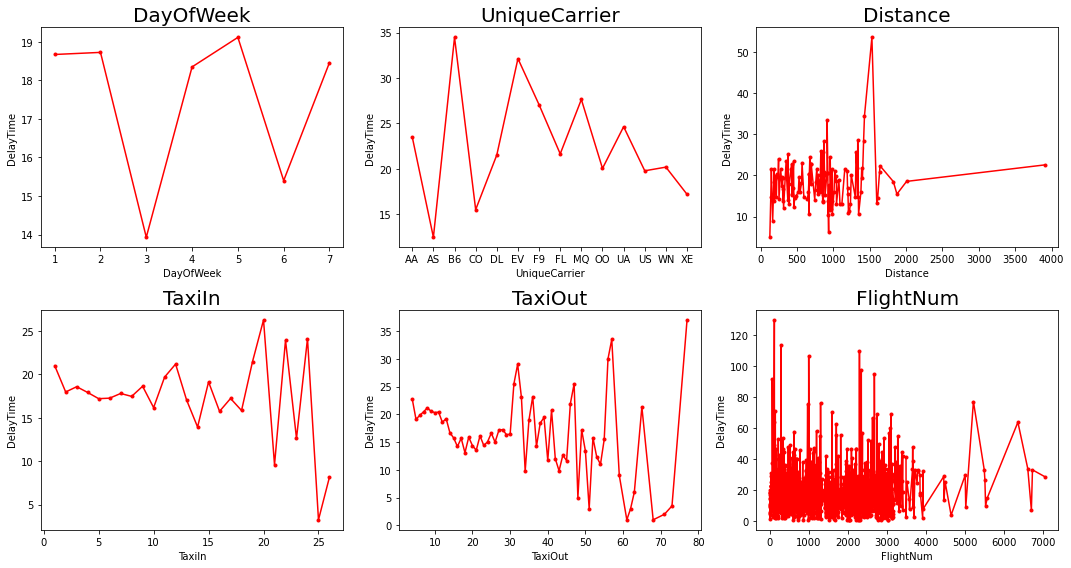

In [332]:
reasons = ['DayOfWeek', 'UniqueCarrier','Distance','TaxiIn','TaxiOut','FlightNum']
index = 0
# filter the new dataframe df_delay only includes delay time data
df_delay = df_flight[(df_flight['DepDelay'] > 0)]
plt.figure(figsize = (15,8))
for f in reasons:
    index +=1
    plt.subplot(2,3,index)
    plt.plot(df_delay.groupby(f)['DepDelay'].mean(),'ro-',ms=3)
    plt.title(f, fontsize=20)
    plt.xlabel(f)
    plt.ylabel('DelayTime')  
plt.tight_layout()
plt.show()

From the above caparable chart, we can see:
- The DayOfWeek on Wednesday and Saturday has low delay time,others have high delay time
- The UniqueCarrier AS and CD has low delay time, B6,EV has the high delay time
- The Distance is around 1500 has highest delay time.
- The TaxiIn is 25 has low dalay time
- TaciOut and FlightNum has imbalanced distribution.

# Research Results
## Question1: Which airport has the lower rate of flight delay? Passenger standpoint

From EDA, the airport IAH has lower rate to delay than HOU. The passengers should choose IAH if they don't want delay situation happened

## Question2: What reasons will be in result of DepDelay? Airport and passenger standpoint

From EDA, Day of Week, UniqueCarrier, TaxiIn may be the reason result in DepDelay. 
- Airport should pay more attention to increase more staff on Monday, Tuesday, Thursday, Friday and Sunday. In the mean time, passengers can choose Wednesday to depart to avoid delay departure.
- Except UniqueCarrier AS and CD, other carrier should pay more attention to the delay reason. In the mean time, passengers can choose AS or CD carrier plane to depart to avoid delay departure.
- Airport should increase TaxiIn numbers to avoid delay departure.

## Question3: What's the ranking of depart delay from Unique Carrier? Passenger standpoint

From EDA, the lowest to highest ranking of Unique Carrier is:
AS < CO < XE < US < OO < WN < DL < FL < AA < UA < F9 < MQ < EV < B6
- passengers can choose the unique carrier by this ranking to avoid too much delay time.

# Conclusion
- Based on the results , I believe this prepocessed data can be used for building model. We may use the provided data to estimate the rate of the flight which will be delayed. 
- For this dataset, passengers should choose IAH  airport, AS or CD carrier and depart on Wednesday can avoid delays to the maximum extent possible.
- In the result, this dataset will help airport to reduce the rate of delay and help passengers to make the satisfied choice by analyzing the dataset.